In [1]:
import os
import pydub
import matplotlib.pyplot as plt

In [2]:
voice_1 = pydub.AudioSegment.from_file("raw_data\Khadijeh_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data\Khadijeh_2.ogg")

result = voice_1 + voice_2

result.export("data\Khadijeh.ogg")

<_io.BufferedRandom name='data\\Khadijeh.ogg'>

In [3]:
voice_1 = pydub.AudioSegment.from_file("raw_data\Parsa_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data\Parsa_2.ogg")

result = voice_1 + voice_2

result.export("data\Parsa.ogg")

<_io.BufferedRandom name='data\\Parsa.ogg'>

In [4]:
voice_1 = pydub.AudioSegment.from_file("raw_data\Mona.m4a")
voice_1.export("data\Mona.ogg")

<_io.BufferedRandom name='data\\Mona.ogg'>

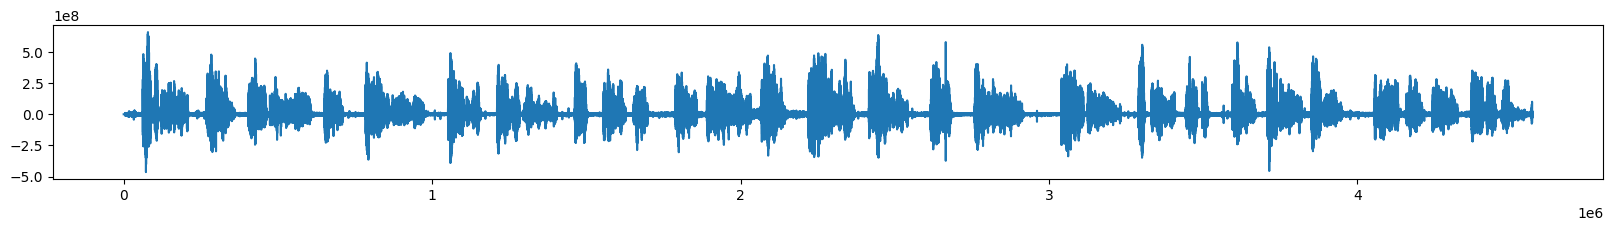

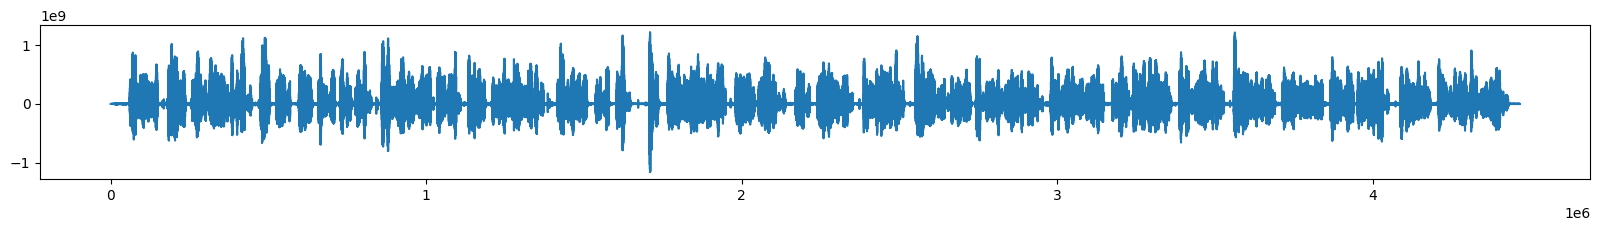

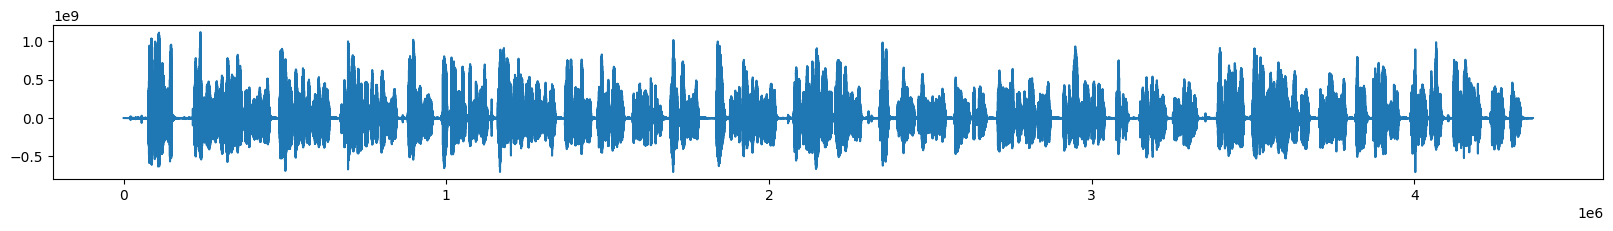

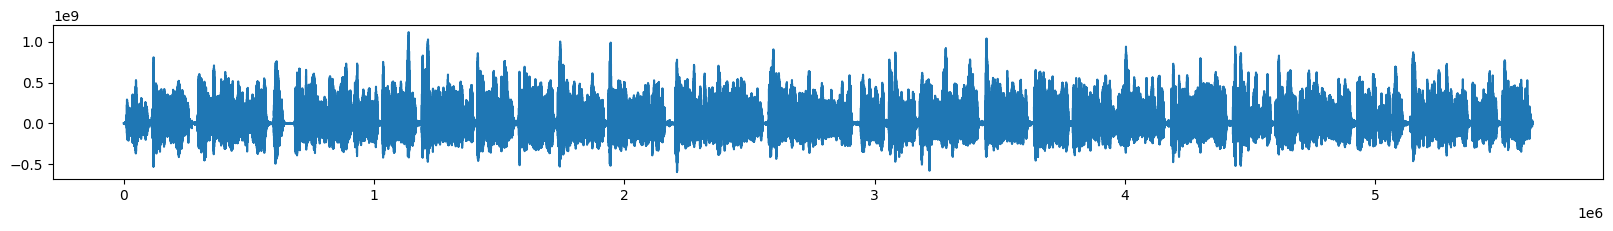

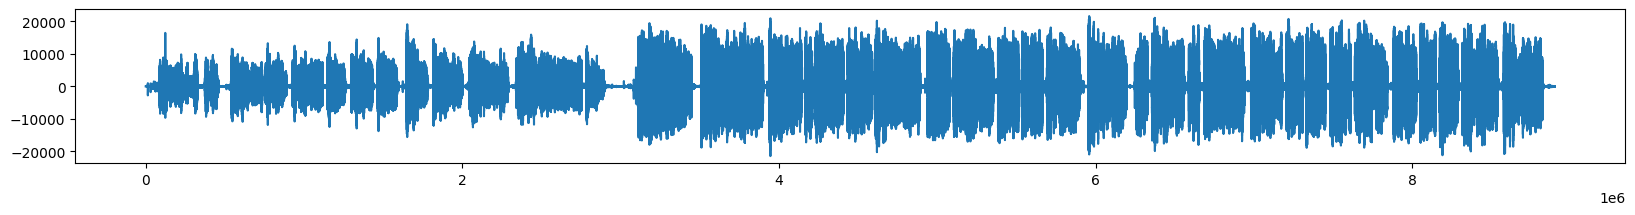

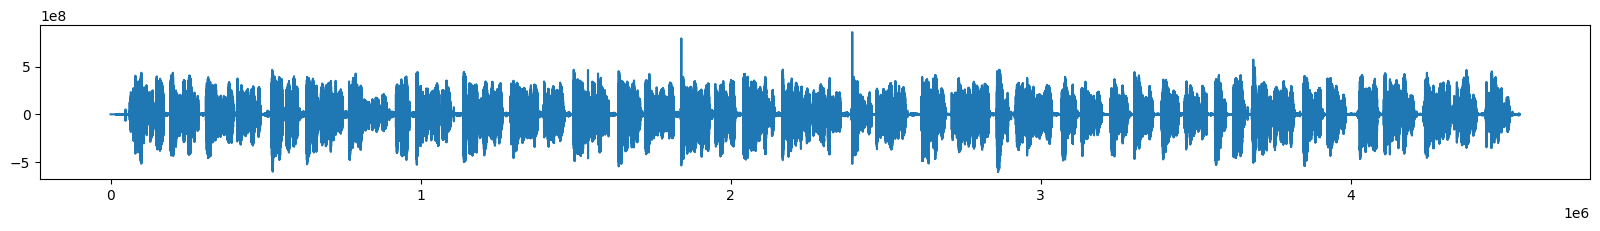

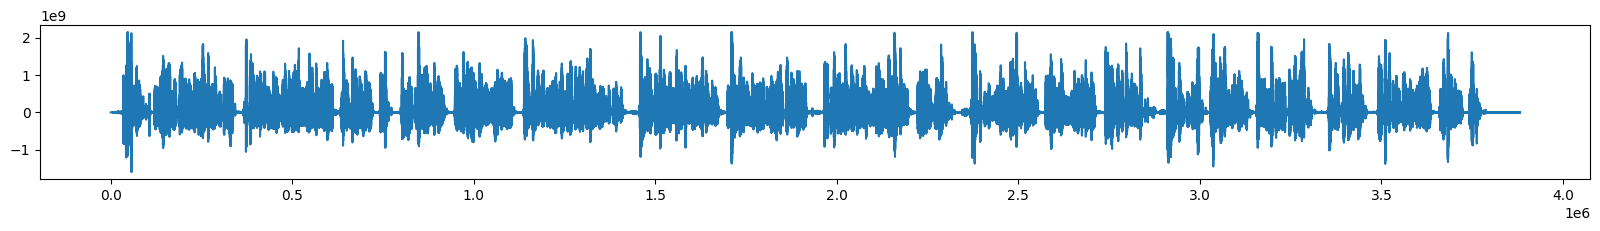

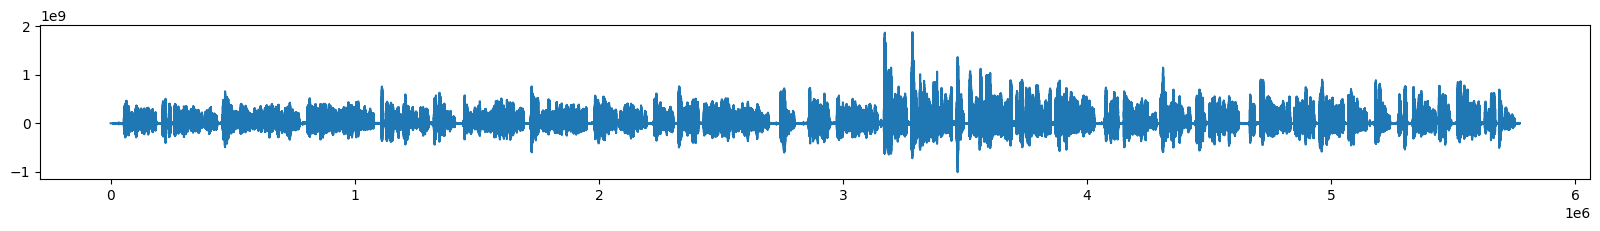

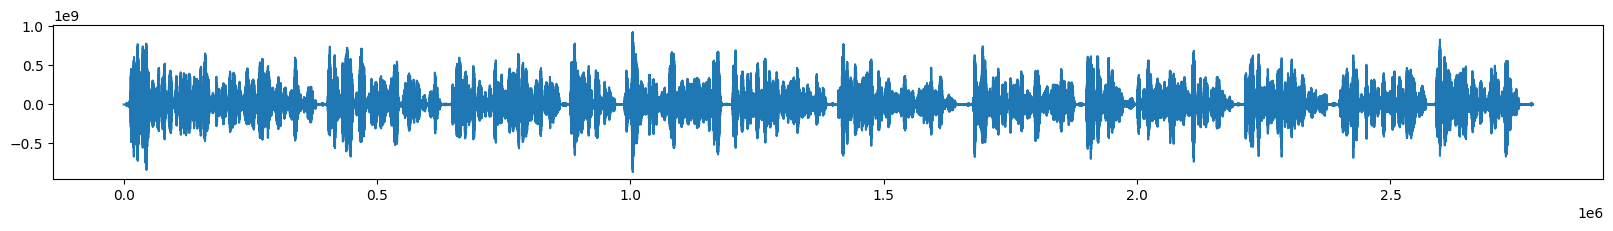

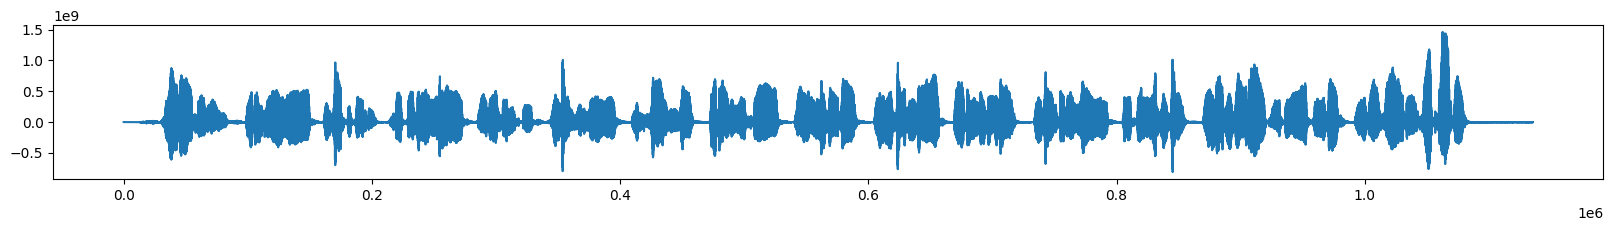

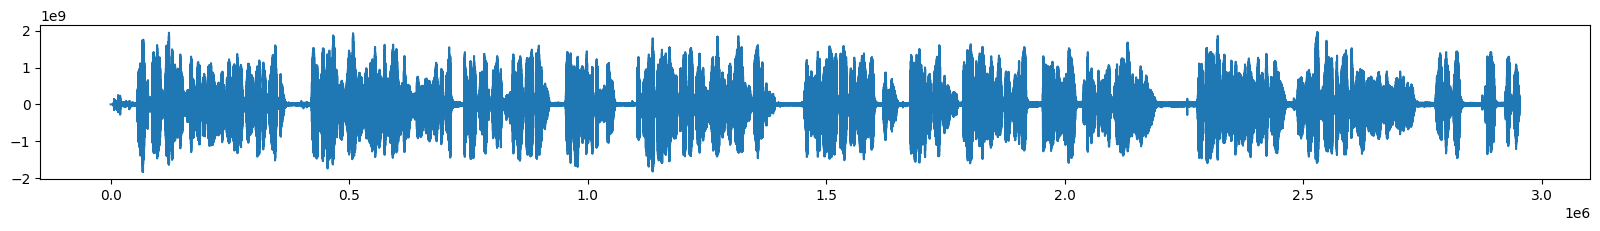

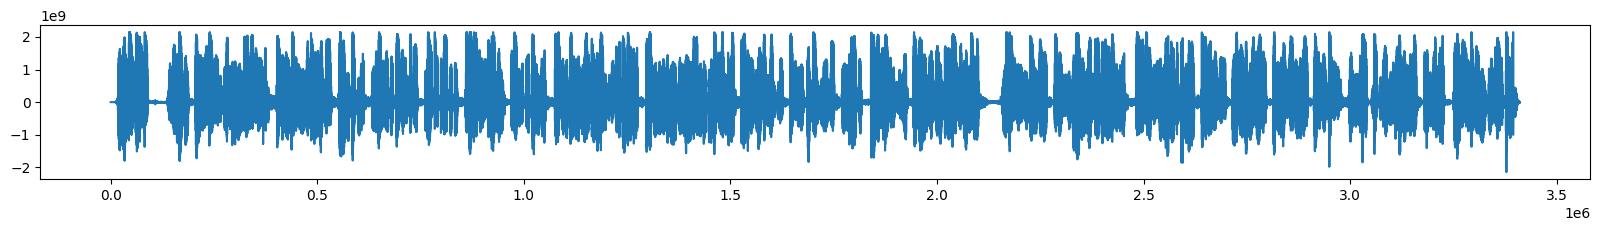

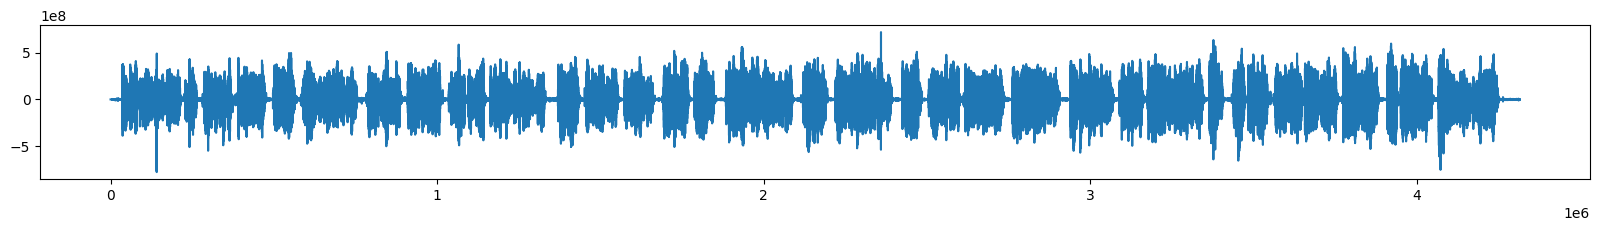

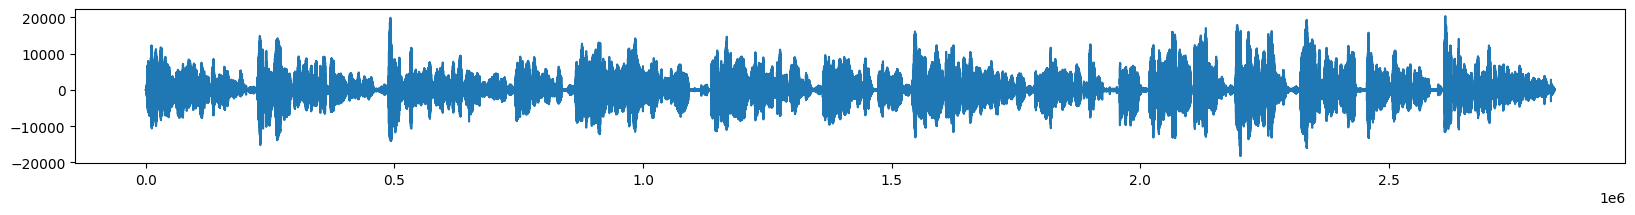

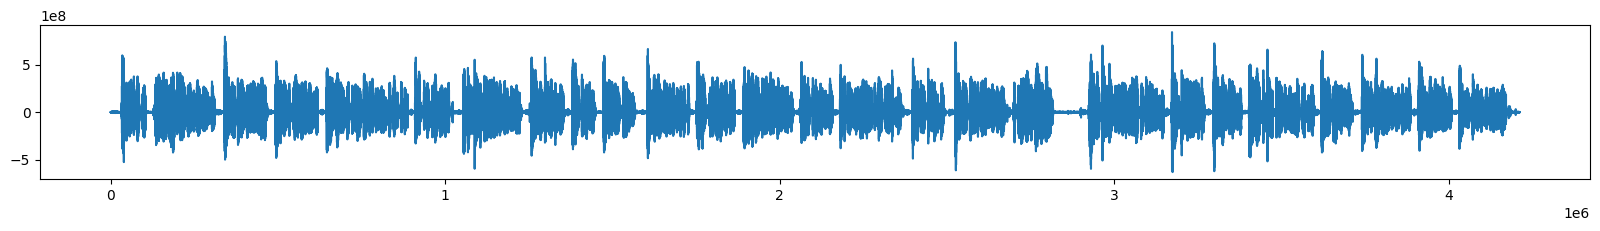

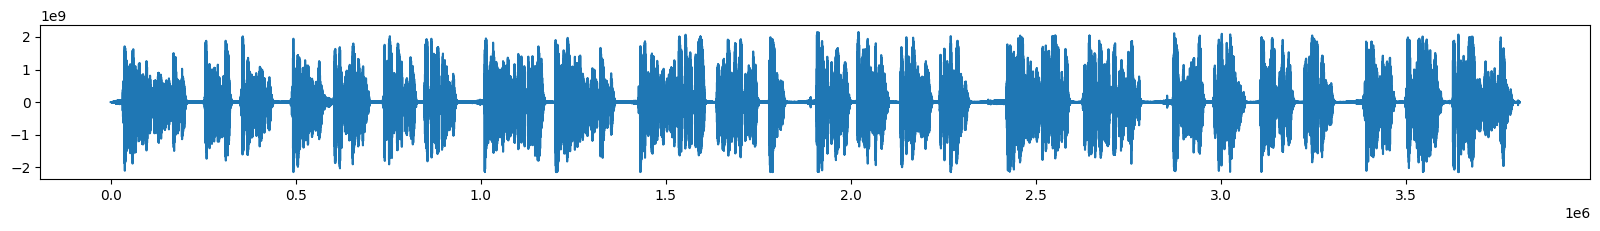

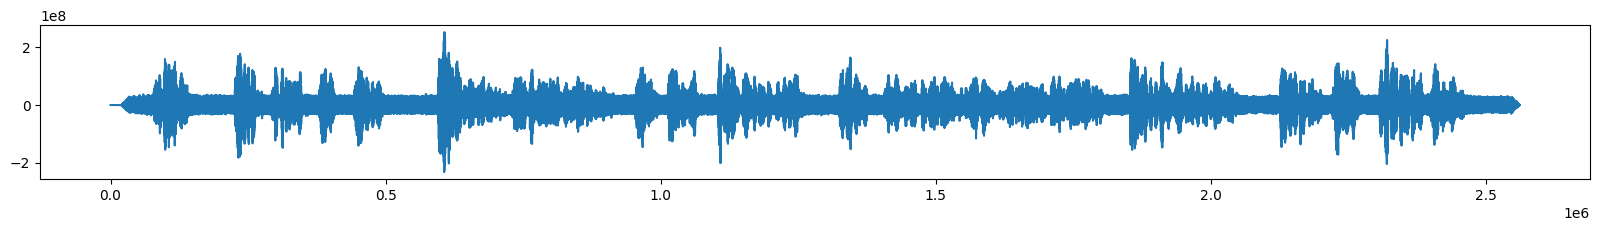

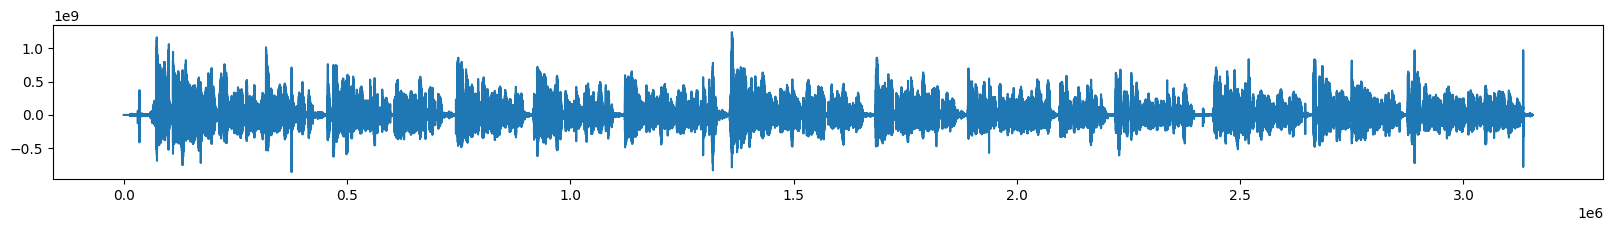

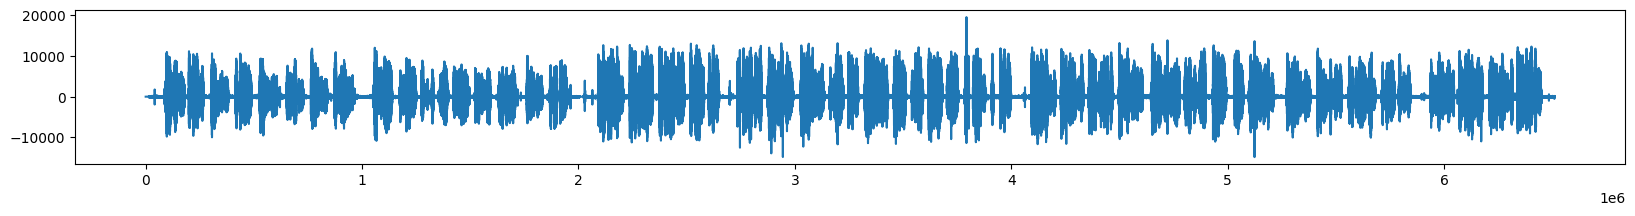

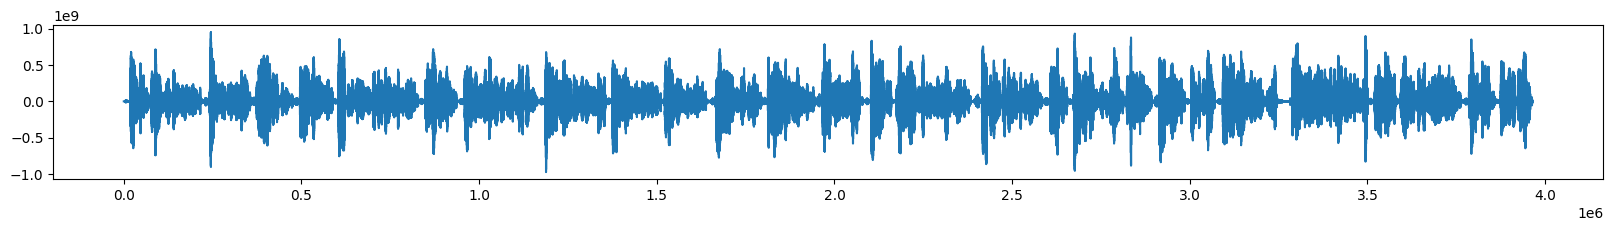

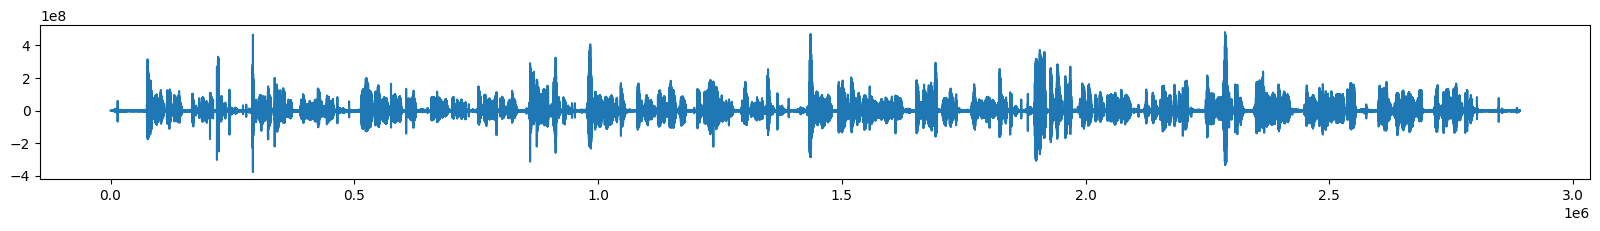

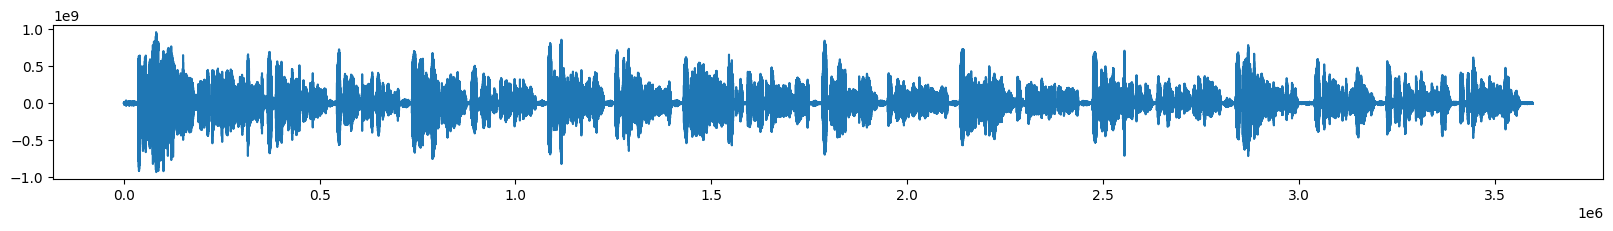

In [5]:
files = os.listdir("data")

for file in files:
    file_path = os.path.join("data", file)
    audio = pydub.AudioSegment.from_file(file_path)

    audio_array = audio.get_array_of_samples()

    plt.figure(figsize=(20, 2))
    plt.plot(audio_array)
    plt.show()

    audio = audio.set_sample_width(2)  # convert to 16-bit (2 bytes per sample) to avoid tensorflow error
    audio = audio.set_frame_rate(48000)
    audio = audio.set_channels(1)  # convert stereo audio to mono audio to avoid tensorflow error

    chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
    result = sum(chunks)
    file_name = file.split(".")[0]
    result.export("wav_data/"+file_name+".wav")

In [6]:
for file in os.listdir("wav_data"):

    file_path = os.path.join("wav_data", file)
    audio = pydub.AudioSegment.from_file(file_path)
    
    name = file.split(".")[0]
    folder_path = os.path.join("dataset", name)
    os.makedirs(folder_path, exist_ok=True)

    chunks = pydub.utils.make_chunks(audio, 1000)

    for i , chunk in enumerate(chunks):
        if len(chunk) < 1000 :
            continue
        chunk.export(os.path.join("dataset", name, f"voice{i}.wav"), format="wav")